1.算子w的选择
![suanzi](./k6/%E6%8D%9F%E5%A4%B1%E5%87%BD%E6%95%B0python.PNG)

In [30]:
import numpy as np


In [31]:
x = np.linspace(-2,8)
print (x)
y = x**2 + 3*x -7 + np.random.uniform(-3,3,size = x.shape)

# compute estimate from before:
x_centered = x - np.mean(x)
y_centered = y - np.mean(y)
beta_1 = (x_centered.T @ y_centered) / sum(np.square(x_centered))
beta_0 = np.mean(y) - beta_1 * np.mean(x)
print("line equation is y = %f*x +%f" % (beta_1,beta_0))

[-2.         -1.79591837 -1.59183673 -1.3877551  -1.18367347 -0.97959184
 -0.7755102  -0.57142857 -0.36734694 -0.16326531  0.04081633  0.24489796
  0.44897959  0.65306122  0.85714286  1.06122449  1.26530612  1.46938776
  1.67346939  1.87755102  2.08163265  2.28571429  2.48979592  2.69387755
  2.89795918  3.10204082  3.30612245  3.51020408  3.71428571  3.91836735
  4.12244898  4.32653061  4.53061224  4.73469388  4.93877551  5.14285714
  5.34693878  5.55102041  5.75510204  5.95918367  6.16326531  6.36734694
  6.57142857  6.7755102   6.97959184  7.18367347  7.3877551   7.59183673
  7.79591837  8.        ]
line equation is y = 9.074493*x +-7.203269


1.np.linspace 函数返回间隔类均匀分布的数值序列 

2.np.random.uniform 从均匀分布中抽取样本[low, high)

3.np.square 矩阵元素的平方

4.@是一个操作符，表示矩阵-向量乘法



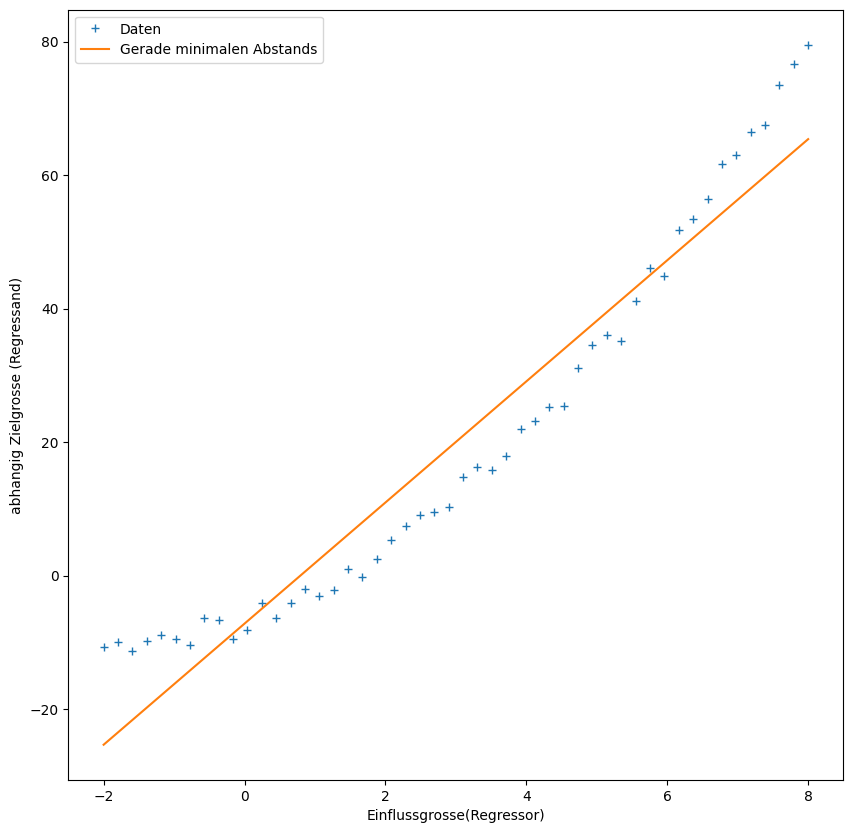

In [32]:
import matplotlib.pyplot as plt
fig,ax =plt.subplots(figsize = (10,10))
ax.plot(x,y,"+",label="Daten")
ax.plot(x,beta_0 + x * beta_1, label="Gerade minimalen Abstands")
ax.set_xlabel("Einflussgrosse(Regressor)")
ax.set_ylabel("abhangig Zielgrosse (Regressand)")
ax.legend()
plt.show()


我们可以使用 pyplot 中的 subplot() 和 subplots() 方法来绘制多个子图。

subplot() 方法在绘图时需要指定位置，subplots() 方法可以一次生成多个，在调用时只需要调用生成对象的 ax 即可

2.线性回归

In [33]:
from sklearn.linear_model import LinearRegression

# first lbok at linear, to compare with the above:
linear_regressor = LinearRegression()
linear_regressor.fit(x.reshape(-1,1),y)
Y_pred = linear_regressor.predict(x.reshape(-1,1))

普通最小二乘线性回归

decision_function(X)    对训练数据X进行预测

fit(X, y[, n_jobs])   对训练集X, y进行训练。是对scipy.linalg.lstsq的封装

predict(X)  使用训练得到的估计器对输入为X的集合进行预测（X可以是测试集，也可以是需要预测的数据）

score(X, y[,]sample_weight)   返回对于以X为samples，以y为target的预测效果评分。

set_params(**params)     设置估计器的参数

In [34]:
from scipy.optimize import curve_fit

# define function class for regression (Linear):

def f(x,beta_0,beta_1):
    return beta_1*x + beta_0

# perform regression analysis:
# 得到返回的A，B值 比较
parameters,covariance_matrix = curve_fit(f,x,y)
assert np.all(np.isclose((beta_0,beta_1),parameters))

optimize.curve_fit()  数据曲线拟合

多项式分布

In [36]:
# define basis function class
def phi(x,d) :
    return np.dstack([np.power(x,i) for i in range (d+1)]).squeeze()
    # 按深度顺序堆叠arrays。当数组为2维数组(M,N)或1维数组(N,)时，首先分别将其维度改变为(M,N,1)、(1,N,1)，然后沿着第三根轴(r/g/b通道)进行拼接

def plot_regression(x,y,Y_pred,ax,x_test = None,y_test = None):
    ax.plot(x,y,"+",label = "Daten")
    if(x_test is None):
        x_test = x
    ax.plot(x_test,Y_pred,label="Modell")
    if(y_test is None):
        y_test = y
    yerr = np.stack((np.maximum(np.zeros_like(y_test),y_test - Y_pred),np.minimum(np.zeros_like(y_test),y_test - Y_pred)))
    ax.errorbar(x_test,y_test,yerr=yerr,linewidth=0,elinewidth=1,label="Residuen")
    ax.set_xlabel("Einflussgrosse(Regressor)")
    ax.set_ylabel("abhangige Zielgrosse(Regressand)")
    ax.legend()
    return ax

def poly_regression_plot(x,y,d):
    #perform regression analysis
    transformed_x = phi(x,d)

    linear_regressor = LinearRegression()
    linear_regressor.fit(transformed_x,y)
    Y_pred = linear_regressor.predict(transformed_x)

    fig,ax = plt.subplots(figsize = (10,10))
    plot_regression(x,y,Y_pred,ax).\
        set_title("Polynomiale Regression von Grad %d" %d)
    plt.show()